In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Jonas_1", "'word', 'lord', 'came', 'jonah', 'son', 'amittai', ',', 'saying', ',', 'arise', ',', 'go', 'nineveh', ',', 'great', 'city', ',', 'cry', ';', 'wickedness', 'come', 'me.but', 'jonah', 'rose', 'flee', 'tarshish', 'presence', 'lord', ',', 'went', 'joppa', ';', 'found', 'ship', 'going', 'tarshish', ':', 'paid', 'fare', 'thereof', ',', 'went', ',', 'go', 'tarshish', 'presence', 'lord.but', 'lord', 'sent', 'great', 'wind', 'sea', ',', 'mighty', 'tempest', 'sea', ',', 'ship', 'like', 'broken.then', 'mariners', 'afraid', ',', 'cried', 'every', 'man', 'god', ',', 'cast', 'forth', 'wares', 'ship', 'sea', ',', 'lighten', '.', 'jonah', 'gone', 'sides', 'ship', ';', 'lay', ',', 'fast', 'asleep.so', 'shipmaster', 'came', ',', 'said', ',', 'mean', ',', 'sleeper', '?', 'arise', ',', 'call', 'god', ',', 'god', 'think', 'us', ',', 'perish', 'not.and', 'said', 'every', 'one', 'fellow', ',', 'come', ',', 'let', 'us', 'cast', 'lots', ',', 'may', 'know', 'whose', 'cause', 'evil', 'us', '.', 'cast', 'lots', ',', 'lot', 'fell', 'jonah.then', 'said', ',', 'tell', 'us', ',', 'pray', ',', 'whose', 'cause', 'evil', 'us', ';', 'occupation', '?', 'come', '?', 'country', '?', 'people', '?', 'said', ',', 'hebrew', ';', 'fear', 'lord', ',', 'god', 'heaven', ',', 'made', 'sea', 'dry', 'land.then', 'men', 'exceedingly', 'afraid', ',', 'said', '.', 'done', '?', 'men', 'knew', 'fled', 'presence', 'lord', ',', 'told', 'them.then', 'said', ',', 'shall', ',', 'sea', 'may', 'calm', 'us', '?', 'sea', 'worked', ',', 'tempestuous.and', 'said', ',', 'take', ',', 'cast', 'forth', 'sea', ';', 'shall', 'sea', 'calm', ':', 'know', 'sake', 'great', 'tempest', 'you.nevertheless', 'men', 'rowed', 'hard', 'bring', 'land', ';', 'could', ':', 'sea', 'worked', ',', 'tempestuous', 'them.why', 'cried', 'lord', ',', 'said', ',', 'beseech', ',', 'lord', ',', 'beseech', ',', 'let', 'us', 'perish', 'man', ', 'life', ',', 'lay', 'us', 'innocent', 'blood', ':', ',', 'lord', ',', 'done', 'pleased', 'you.so', 'look', 'jonah', ',', 'cast', 'forth', 'sea', ':', 'sea', 'ceased', 'raging.then', 'men', 'feared', 'lord', 'exceedingly', ',', 'offered', 'sacrifice', 'lord', ',', 'made', 'vows.now', 'lord', 'prepared', 'great', 'fish', 'swallow', 'jonah', '.', 'jonah', 'belly', 'fish', 'three', 'days', 'three', 'nights', '.'"],
               ["Jonas_2", "'jonah', 'prayed', 'lord', 'god', 'fish', ', 'belly', ',', 'said', ',', 'cried', 'reason', 'affliction', 'lord', ',', 'heard', ';', 'belly', 'hell', 'cried', ',', 'heard', 'voice.for', 'cast', 'deep', ',', 'middle', 'seas', ';', 'floods', 'compassed', ':', 'billows', 'waves', 'passed', 'me.then', 'said', ',', 'cast', 'sight', ';', 'yet', 'look', 'toward', 'holy', 'temple.the', 'waters', 'compassed', ',', 'even', 'soul', ':', 'depth', 'closed', 'round', ',', 'weeds', 'wrapped', 'head.i', 'went', 'bottoms', 'mountains', ';', 'earth', 'bars', 'ever', ':', 'yet', 'brought', 'life', 'corruption', ',', 'lord', 'god.when', 'soul', 'fainted', 'within', 'remembered', 'lord', ':', 'prayer', 'came', ',', 'holy', 'temple.they', 'observe', 'lying', 'vanities', 'forsake', 'mercy.but', 'sacrifice', 'voice', 'thanksgiving', ';', 'pay', 'vowed', '.', 'salvation', 'lord.and', 'lord', 'spoke', 'fish', ',', 'vomited', 'jonah', 'dry', 'land', '.'"],
               ["Jonas_3", "'word', 'lord', 'came', 'jonah', 'second', 'time', ',', 'saying', ',', 'arise', ',', 'go', 'nineveh', ',', 'great', 'city', ',', 'preach', 'preaching', 'bid', 'you.so', 'jonah', 'arose', ',', 'went', 'nineveh', ',', 'according', 'word', 'lord', '.', 'nineveh', 'exceeding', 'great', 'city', 'three', days'journey.and, 'jonah', 'began', 'enter', 'city', 'day', ', 'journey', ',', 'cried', ',', 'said', ',', 'yet', 'forty', 'days', ',', 'nineveh', 'shall', 'overthrown.so', 'people', 'nineveh', 'believed', 'god', ',', 'proclaimed', 'fast', ',', 'put', 'sackcloth', ',', 'greatest', 'even', 'least', 'them.for', 'word', 'came', 'king', 'nineveh', ',', 'arose', 'throne', ',', 'laid', 'robe', ',', 'covered', 'sackcloth', ',', 'sat', 'ashes.and', 'caused', 'proclaimed', 'published', 'nineveh', 'decree', 'king', 'nobles', ',', 'saying', ',', 'let', 'neither', 'man', 'beast', ',', 'herd', 'flock', ',', 'taste', 'thing', ':', 'let', 'feed', ',', 'drink', 'water', ':', 'let', 'man', 'beast', 'covered', 'sackcloth', ',', 'cry', 'mightily', 'god', ':', 'yes', ',', 'let', 'turn', 'every', 'one', 'evil', 'way', ',', 'violence', 'hands.who', 'tell', 'god', 'turn', 'repent', ',', 'turn', 'away', 'fierce', 'anger', ',', 'perish', '?', 'god', 'saw', 'works', ',', 'turned', 'evil', 'way', ';', 'god', 'repented', 'evil', ',', 'said', 'would', ';', '.'"],
               ["Jonas_4", "'displeased', 'jonah', 'exceedingly', ',', 'angry.and', 'prayed', 'lord', ',', 'said', ',', 'pray', ',', 'lord', ',', 'saying', ',', 'yet', 'country', '?', 'therefore', 'fled', 'tarshish', ':', 'knew', 'gracious', 'god', ',', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repent', 'evil.therefore', ',', 'lord', ',', 'take', ',', 'beseech', ',', 'life', ';', 'better', 'die', 'live.then', 'said', 'lord', ',', 'well', 'angry', '?', 'jonah', 'went', 'city', ',', 'sat', 'east', 'side', 'city', ',', 'made', 'booth', ',', 'sat', 'shadow', ',', 'till', 'might', 'see', 'would', 'become', 'city.and', 'lord', 'god', 'prepared', 'gourd', ',', 'made', 'come', 'jonah', ',', 'might', 'shadow', 'head', ',', 'deliver', 'grief', '.', 'jonah', 'exceeding', 'glad', 'gourd.but', 'god', 'prepared', 'worm', 'morning', 'rose', 'next', 'day', ',', 'smote', 'gourd', 'withered.and', 'came', 'pass', ',', 'sun', 'arise', ',', 'god', 'prepared', 'vehement', 'east', 'wind', ';', 'sun', 'beat', 'head', 'jonah', ',', 'fainted', ',', 'wished', 'die', ',', 'said', ',', 'better', 'die', 'live.and', 'god', 'said', 'jonah', ',', 'well', 'angry', 'gourd', '?', 'said', ',', 'well', 'angry', ',', 'even', 'death.then', 'said', 'lord', ',', 'pity', 'gourd', ',', 'labored', ',', 'neither', 'made', 'grow', ';', 'came', 'night', ',', 'perished', 'night', ':', 'spare', 'nineveh', ',', 'great', 'city', ',', 'wherein', 'six', 'score', 'thousand', 'persons', 'discern', 'right', 'hand', 'left', 'hand', ';', 'also', 'much', 'cattle', '?'"],
               ["Malaquias1", "'burden', 'word', 'lord', 'israel', 'malachi.i', 'loved', ',', 'said', 'lord', '.', 'yet', 'say', ',', 'wherein', 'loved', 'us', '?', 'esau', 'jacob', ', 'brother', '?', 'said', 'lord', ':', 'yet', 'loved', 'jacob', ',', 'hated', 'esau', ',', 'laid', 'mountains', 'heritage', 'waste', 'dragons', 'wilderness.whereas', 'edom', 'said', ',', 'impoverished', ',', 'return', 'build', 'desolate', 'places', ';', 'thus', 'said', 'lord', 'hosts', ',', 'shall', 'build', ',', 'throw', ';', 'shall', 'call', ',', 'border', 'wickedness', ',', ',', 'people', 'lord', 'indignation', 'ever.and', 'eyes', 'shall', 'see', ',', 'shall', 'say', ',', 'lord', 'magnified', 'border', 'israel.a', 'son', 'honors', 'father', ',', 'servant', 'master', ':', 'father', ',', 'honor', '?', 'master', ',', 'fear', '?', 'said', 'lord', 'hosts', ',', 'priests', ',', 'despise', 'name', '.', 'say', ',', 'wherein', 'despised', 'name', '?', 'offer', 'polluted', 'bread', 'altar', ';', 'say', ',', 'wherein', 'polluted', '?', 'say', ',', 'table', 'lord', 'contemptible.and', 'offer', 'blind', 'sacrifice', ',', 'evil', '?', 'offer', 'lame', 'sick', ',', 'evil', '?', 'offer', 'governor', ';', 'pleased', ',', 'accept', 'person', '?', 'said', 'lord', 'hosts.and', ',', 'pray', ',', 'beseech', 'god', 'gracious', 'us', ':', 'means', ':', 'regard', 'persons', '?', 'said', 'lord', 'hosts.who', 'even', 'among', 'would', 'shut', 'doors', 'nothing', '?', 'neither', 'kindle', 'fire', 'altar', 'nothing', '.', 'pleasure', ',', 'said', 'lord', 'hosts', ',', 'neither', 'accept', 'offering', 'hand.for', 'rising', 'sun', 'even', 'going', 'name', 'shall', 'great', 'among', 'gentiles', ';', 'every', 'place', 'incense', 'shall', 'offered', 'name', ',', 'pure', 'offering', ':', 'name', 'shall', 'great', 'among', 'heathen', ',', 'said', 'lord', 'hosts.but', 'profaned', ',', 'say', ',', 'table', 'lord', 'polluted', ';', 'fruit', 'thereof', ',', 'even', 'meat', ',', 'contemptible.you', 'said', 'also', ',', 'behold', ',', 'weariness', '!', 'snuffed', ',', 'said', 'lord', 'hosts', ';', 'brought', 'torn', ',', 'lame', ',', 'sick', ';', 'thus', 'brought', 'offering', ':', 'accept', 'hand', '?', 'said', 'lord.but', 'cursed', 'deceiver', ',', 'flock', 'male', ',', 'vows', ',', 'sacrifices', 'lord', 'corrupt', 'thing', ':', 'great', 'king', ',', 'said', 'lord', 'hosts', ',', 'name', 'dreadful', 'among', 'heathen', '.'"],
               ["Malaquias_2", "',', 'priests', ',', 'commandment', 'you.if', 'hear', ',', 'lay', 'heart', ',', 'give', 'glory', 'name', ',', 'said', 'lord', 'hosts', ',', 'even', 'send', 'curse', ',', 'curse', 'blessings', ':', 'yes', ',', 'cursed', 'already', ',', 'lay', 'heart.behold', ',', 'corrupt', 'seed', ',', 'spread', 'dung', 'faces', ',', 'even', 'dung', 'solemn', 'feasts', ';', 'one', 'shall', 'take', 'away', 'it.and', 'shall', 'know', 'sent', 'commandment', ',', 'covenant', 'might', 'levi', ',', 'said', 'lord', 'hosts.my', 'covenant', 'life', 'peace', ';', 'gave', 'fear', 'feared', ',', 'afraid', 'name.the', 'law', 'truth', 'mouth', ',', 'iniquity', 'found', 'lips', ':', 'walked', 'peace', 'equity', ',', 'turn', 'many', 'away', 'iniquity.for', 'priest', ', 'lips', 'keep', 'knowledge', ',', 'seek', 'law', 'mouth', ':', 'messenger', 'lord', 'hosts.but', 'departed', 'way', ';', 'caused', 'many', 'stumble', 'law', ';', 'corrupted', 'covenant', 'levi', ',', 'said', 'lord', 'hosts.therefore', 'also', 'made', 'contemptible', 'base', 'people', ',', 'according', 'kept', 'ways', ',', 'partial', 'law.have', 'one', 'father', '?', 'one', 'god', 'created', 'us', '?', 'deal', 'treacherously', 'every', 'man', 'brother', ',', 'profaning', 'covenant', 'fathers', '?', 'judah', 'dealt', 'treacherously', ',', 'abomination', 'committed', 'israel', 'jerusalem', ';', 'judah', 'profaned', 'holiness', 'lord', 'loved', ',', 'married', 'daughter', 'strange', 'god.the', 'lord', 'cut', 'man', ',', 'master', 'scholar', ',', 'tabernacles', 'jacob', ',', 'offers', 'offering', 'lord', 'hosts.and', 'done', ',', 'covering', 'altar', 'lord', 'tears', ',', 'weeping', ',', 'crying', ',', 'regards', 'offering', ',', 'receives', 'good', 'hand.yet', 'say', ',', '?', 'lord', 'witness', 'wife', 'youth', ',', 'dealt', 'treacherously', ':', 'yet', 'companion', ',', 'wife', 'covenant.and', 'make', 'one', '?', 'yet', 'residue', 'spirit', '.', 'one', '?', 'might', 'seek', 'godly', 'seed', '.', 'therefore', 'take', 'heed', 'spirit', ',', 'let', 'none', 'deal', 'treacherously', 'wife', 'youth.for', 'lord', ',', 'god', 'israel', ',', 'said', 'hates', 'putting', 'away', ':', 'one', 'covers', 'violence', 'garment', ',', 'said', 'lord', 'hosts', ':', 'therefore', 'take', 'heed', 'spirit', ',', 'deal', 'treacherously.you', 'wearied', 'lord', 'words', '.', 'yet', 'say', ',', 'wherein', 'wearied', '?', 'say', ',', 'every', 'one', 'evil', 'good', 'sight', 'lord', ',', 'delights', ';', ',', 'god', 'judgment', '?'"],
               ["Malaquias_3", "'behold', ',', 'send', 'messenger', ',', 'shall', 'prepare', 'way', ':', 'lord', ',', 'seek', ',', 'shall', 'suddenly', 'come', 'temple', ',', 'even', 'messenger', 'covenant', ',', 'delight', ':', 'behold', ',', 'shall', 'come', ',', 'said', 'lord', 'hosts.but', 'may', 'abide', 'day', 'coming', '?', 'shall', 'stand', 'appears', '?', 'like', 'refiner', ', 'fire', ',', 'like', fullers'soap, ':', 'shall', 'sit', 'refiner', 'purifier', 'silver', ':', 'shall', 'purify', 'sons', 'levi', ',', 'purge', 'gold', 'silver', ',', 'may', 'offer', 'lord', 'offering', 'righteousness.then', 'shall', 'offering', 'judah', 'jerusalem', 'pleasant', 'lord', ',', 'days', 'old', ',', 'former', 'years.and', 'come', 'near', 'judgment', ';', 'swift', 'witness', 'sorcerers', ',', 'adulterers', ',', 'false', 'swearers', ',', 'oppress', 'hireling', 'wages', ',', 'widow', ',', 'fatherless', ',', 'turn', 'aside', 'stranger', 'right', ',', 'fear', ',', 'said', 'lord', 'hosts.for', 'lord', ',', 'change', ';', 'therefore', 'sons', 'jacob', 'consumed.even', 'days', 'fathers', 'gone', 'away', 'ordinances', ',', 'kept', '.', 'return', ',', 'return', ',', 'said', 'lord', 'hosts', '.', 'said', ',', 'wherein', 'shall', 'return', '?', 'man', 'rob', 'god', '?', 'yet', 'robbed', '.', 'say', ',', 'wherein', 'robbed', '?', 'tithes', 'offerings.you', 'cursed', 'curse', ':', 'robbed', ',', 'even', 'whole', 'nation.bring', 'tithes', 'storehouse', ',', 'may', 'meat', 'house', ',', 'prove', 'herewith', ',', 'said', 'lord', 'hosts', ',', 'open', 'windows', 'heaven', ',', 'pour', 'blessing', ',', 'shall', 'room', 'enough', 'receive', 'it.and', 'rebuke', 'devourer', 'sakes', ',', 'shall', 'destroy', 'fruits', 'ground', ';', 'neither', 'shall', 'vine', 'cast', 'fruit', 'time', 'field', ',', 'said', 'lord', 'hosts.and', 'nations', 'shall', 'call', 'blessed', ':', 'shall', 'delightsome', 'land', ',', 'said', 'lord', 'hosts.your', 'words', 'stout', ',', 'said', 'lord', '.', 'yet', 'say', ',', 'spoken', 'much', '?', 'said', ',', 'vain', 'serve', 'god', ':', 'profit', 'kept', 'ordinance', ',', 'walked', 'mournfully', 'lord', 'hosts', '?', 'call', 'proud', 'happy', ';', 'yes', ',', 'work', 'wickedness', 'set', ';', 'yes', ',', 'tempt', 'god', 'even', 'delivered.then', 'feared', 'lord', 'spoke', 'often', 'one', 'another', ':', 'lord', 'listened', ',', 'heard', ',', 'book', 'remembrance', 'written', 'feared', 'lord', ',', 'thought', 'name.and', 'shall', 'mine', ',', 'said', 'lord', 'hosts', ',', 'day', 'make', 'jewels', ';', 'spare', ',', 'man', 'spares', 'son', 'serves', 'him.then', 'shall', 'return', ',', 'discern', 'righteous', 'wicked', ',', 'serves', 'god', 'serves', '.'"],
               ["Malaquias_4", "',', 'behold', ',', 'day', 'comes', ',', 'shall', 'burn', 'oven', ';', 'proud', ',', 'yes', ',', 'wickedly', ',', 'shall', 'stubble', ':', 'day', 'comes', 'shall', 'burn', ',', 'said', 'lord', 'hosts', ',', 'shall', 'leave', 'neither', 'root', 'branch.but', 'fear', 'name', 'shall', 'sun', 'righteousness', 'arise', 'healing', 'wings', ';', 'shall', 'go', 'forth', ',', 'grow', 'calves', 'stall.and', 'shall', 'tread', 'wicked', ';', 'shall', 'ashes', 'soles', 'feet', 'day', 'shall', ',', 'said', 'lord', 'hosts.remember', 'law', 'moses', 'servant', ',', 'commanded', 'horeb', 'israel', ',', 'statutes', 'judgments.behold', ',', 'send', 'elijah', 'prophet', 'coming', 'great', 'dreadful', 'day', 'lord', ':', 'shall', 'turn', 'heart', 'fathers', 'children', ',', 'heart', 'children', 'fathers', ',', 'lest', 'come', 'smite', 'earth', 'curse', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,108),columns=['Autor', 'Livro'])

In [8]:
corpus = df['Livro'].tolist()

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

8 rows


,0,1,2,3,4,5,6,7
cast forth sea,0.130179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cause evil us,0.130179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sea worked tempestuous,0.130179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tarshish presence lord,0.130179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
us cast lots,0.130179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whose cause evil,0.130179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid cried every,0.065090,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid said done,0.065090,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amittai saying arise,0.065090,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and said every,0.065090,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [11]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [12]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


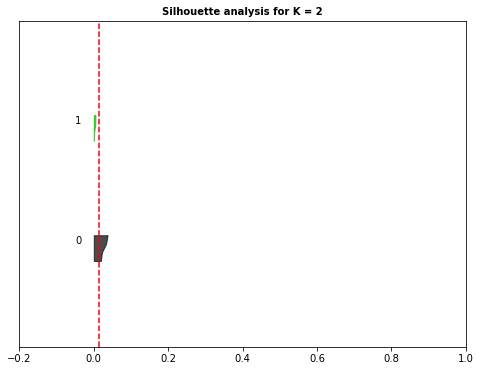

In [13]:
silhouette(kmeans_results, final_df, plot=True)

In [14]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

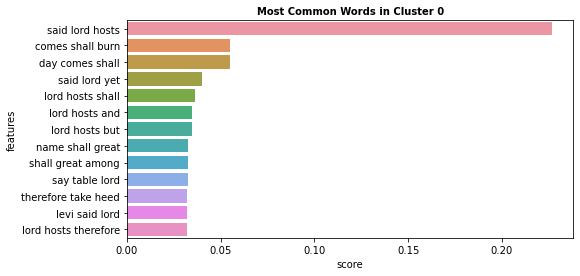

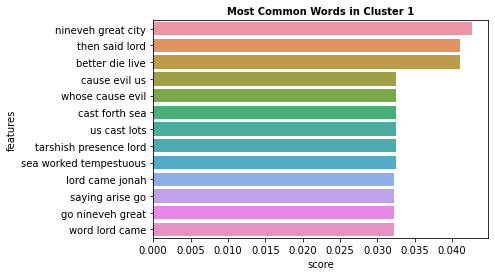

In [15]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [16]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

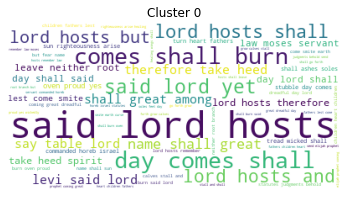

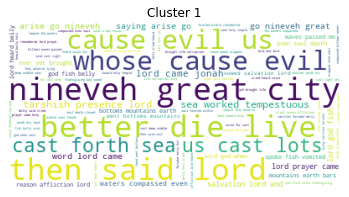

In [17]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [18]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Jonas_1,"'word', 'lord', 'came', 'jonah', 'son', 'amitt...",1
101,Jonas_2,"'jonah', 'prayed', 'lord', 'god', 'fish', ', '...",1
102,Jonas_3,"'word', 'lord', 'came', 'jonah', 'second', 'ti...",1
103,Jonas_4,"'displeased', 'jonah', 'exceedingly', ',', 'an...",1
104,Malaquias1,"'burden', 'word', 'lord', 'israel', 'malachi.i...",0


In [19]:
print(df)

           Autor                                              Livro  label
100      Jonas_1  'word', 'lord', 'came', 'jonah', 'son', 'amitt...      1
101      Jonas_2  'jonah', 'prayed', 'lord', 'god', 'fish', ', '...      1
102      Jonas_3  'word', 'lord', 'came', 'jonah', 'second', 'ti...      1
103      Jonas_4  'displeased', 'jonah', 'exceedingly', ',', 'an...      1
104   Malaquias1  'burden', 'word', 'lord', 'israel', 'malachi.i...      0
105  Malaquias_2  ',', 'priests', ',', 'commandment', 'you.if', ...      0
106  Malaquias_3  'behold', ',', 'send', 'messenger', ',', 'shal...      0
107  Malaquias_4  ',', 'behold', ',', 'day', 'comes', ',', 'shal...      0
